- **Proyecto Final** - Curso de Minería de Datos
- **Presentado por:** ALEJANDRO MORENO FONSECA
- **Profesor:** ISAAC ZAINEA

## 1. Cargue de librerias, datos y Preprocesamiento
Cargar las librerias, las bases de datos y el preprocesamiento de la misma forma en que se hizo en el análisis exploratorio.

In [95]:
# Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder

# Cargar datos
ruta_archivo = "../Datos/ObesityDataSet_raw_and_data_sinthetic.csv"
Datos = pd.read_csv(ruta_archivo)
Datos

# Definir las categorias de la variable objetivo
Cat_Objetivo = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Definir la variable objetivo
Var_Objetivo = OrdinalEncoder(categories=[Cat_Objetivo])
y=Var_Objetivo.fit(Datos[['NObeyesdad']])
Y=y.transform(Datos[['NObeyesdad']])
X=Datos.drop(['NObeyesdad'],axis=1)

# Dividir los datos (80% entrenamiento, 20% Testeo)
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=123)
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", Y_train.shape)
print("Forma de y_test:", Y_test.shape)

# Preprocesamiento
Numericas2 = ["Age","FCVC","NCP","CH2O","FAF","TUE"]
Categoricas2 = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales2 = ["CAEC", "CALC"]

Datos_Numericas = Datos[Numericas2]
Datos_Categoricas = Datos[Categoricas2]
Datos_Ordinales = Datos[Ordinales2]

Transf_Numericas = MinMaxScaler()
Transf_Categoricas = OneHotEncoder(handle_unknown='ignore')
Transf_Ordinales = OrdinalEncoder()

Preprocesamiento = ColumnTransformer(
    transformers=[
        ('NumericasTR', Transf_Numericas, Numericas2),
        ('CategoricasTR', Transf_Categoricas, Categoricas2),
        ('OrdinalesTR', Transf_Ordinales, Ordinales2)
    ],
    verbose_feature_names_out=False,
    )

pipeline = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
     ]
)
pipeline.fit(Datos)

Forma de X_train: (1688, 16)
Forma de X_test: (423, 16)
Forma de y_train: (1688, 1)
Forma de y_test: (423, 1)


Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('NumericasTR', MinMaxScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('CategoricasTR',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('OrdinalesTR',
                                                  OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])],
                                   verbose_feature_names_out=False))])

# 2. Modelos de clasificación - aprendizaje supervisado    

Vamos a utilizar los siguientes 5 modelos de clasificación para comparar: 
- Random Forest
- Naive Bayes
- Regresión Logística
- Árboles de Clasificación
- Redes Neuronales

# 1. MODELO RANDOM FOREST

In [69]:
Random_Forest = RandomForestClassifier(random_state=123)
Modelo_RF = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RF", Random_Forest),       
    ]
)
Modelo_RF.fit(X_train, Y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('NumericasTR', MinMaxScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('CategoricasTR',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('OrdinalesTR',
                                                  OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])],
                                   verbose_feature_names_out=False)),
                ('Clasificador_RF', RandomForestClassifier(random_state=123))])

In [89]:
Results_RF = Modelo_RF['Preprocesamiento']
print(f"Random Forest train accuracy: {Modelo_RF.score(X_train, Y_train):.3f}")
print(f"Random Forest test accuracy: {Modelo_RF.score(X_test, Y_test):.3f}")

Random Forest train accuracy: 1.000
Random Forest test accuracy: 0.872


# 2. MODELO NAIVE BAYES

In [71]:
Naive_Bayes = GaussianNB()
Modelo_NB = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RF", Naive_Bayes),       
    ]
)
Modelo_NB.fit(X_train, Y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('NumericasTR', MinMaxScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('CategoricasTR',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('OrdinalesTR',
                                                  OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])],
                                   verbose_feature_names_out=False)),
                ('Clasificador_RF', GaussianNB())])

In [88]:
Results_NB = Modelo_NB['Preprocesamiento']
print(f"Naive Bayes train accuracy: {Modelo_NB.score(X_train, Y_train):.3f}")
print(f"Naive Bayes test accuracy: {Modelo_NB.score(X_test, Y_test):.3f}")

Naive Bayes train accuracy: 0.438
Naive Bayes test accuracy: 0.449


# 3. MODELO REGRESION LOGISTICA

In [73]:
Regresion_Logistica = LogisticRegression()
Modelo_RL = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RL", Regresion_Logistica),       
    ]
)
Modelo_RL.fit(X_train, Y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('NumericasTR', MinMaxScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('CategoricasTR',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('OrdinalesTR',
                                                  OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])],
                                   verbose_feature_names_out=False)),
                ('Clasificador_RL', LogisticRegression())])

In [87]:
Results_RL = Modelo_RL['Preprocesamiento']
print(f"Regresion Logistica train accuracy: {Modelo_RL.score(X_train, Y_train):.3f}")
print(f"Regresion Logistica test accuracy: {Modelo_RL.score(X_test, Y_test):.3f}")

Regresion Logistica train accuracy: 0.592
Regresion Logistica test accuracy: 0.579


# 4. MODELO ARBOLES DE CLASIFICACION

In [82]:
Arboles_Clasificacion = DecisionTreeClassifier()
Modelo_AC = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RF", Arboles_Clasificacion),       
    ]
)
Modelo_AC.fit(X_train, Y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('NumericasTR', MinMaxScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('CategoricasTR',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('OrdinalesTR',
                                                  OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])],
                                   verbose_feature_names_out=False)),
                ('Clasificador_RF', DecisionTreeClassifier())])

In [86]:
Results_AC = Modelo_AC['Preprocesamiento']
print(f"Arboles de Clasificación train accuracy: {Modelo_AC.score(X_train, Y_train):.3f}")
print(f"Arboles de Clasificación test accuracy: {Modelo_AC.score(X_test, Y_test):.3f}")

Arboles de Clasificación train accuracy: 1.000
Arboles de Clasificación test accuracy: 0.794


# 5. MODELO REDES NEURONALES

In [92]:
Redes_Neuronales = MLPClassifier()
Modelo_RN = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
        ("Clasificador_RL", Redes_Neuronales),       
    ]
)
Modelo_RN.fit(X_train, Y_train)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('NumericasTR', MinMaxScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('CategoricasTR',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('OrdinalesTR',
                                                  OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])],
                                   verbose_feature_names_out=False)),
                ('Clasificador_RL', MLPClassifier())])

In [93]:
Results_RN=Modelo_RN['Preprocesamiento']
print(f"Redes Neuronales train accuracy: {Modelo_RL.score(X_train, Y_train):.3f}")
print(f"Redes Neuronales test accuracy: {Modelo_RL.score(X_test, Y_test):.3f}")

Redes Neuronales train accuracy: 0.592
Redes Neuronales test accuracy: 0.579


# 6. SELECCIONAR EL MEJOR MODELO  

Comparando el ACCURACY de los 5 modelos evaluados tenemos que el **MODELO RANDOM FOREST** es el más adecuado dado que proporciona los mejores indicadores de precisión:
<br>
<br>
---------- **TRAIN ACCURACY:** ----------
- **Random Forest train accuracy:             1.000**
- Naive Bayes train accuracy:               0.438
- Regresion Logistica train accuracy:       0.592
- Arboles de Clasificación train accuracy:  1.000
- Redes Neuronales train accuracy:          0.592
<br>
<br>
---------- **TEST ACCURACY:** -----------
- **Random Forest test accuracy:              0.872** 
- Naive Bayes test accuracy:                0.449
- Regresion Logistica test accuracy:        0.579
- Arboles de Clasificación test accuracy:   0.794
- Redes Neuronales test accuracy:           0.579

# 7. ALGUNOS RESULTADOS ADICIONALES DEL MODELO RANDOM FOREST

IMPORTANCIA DE LAS VARIABLES:

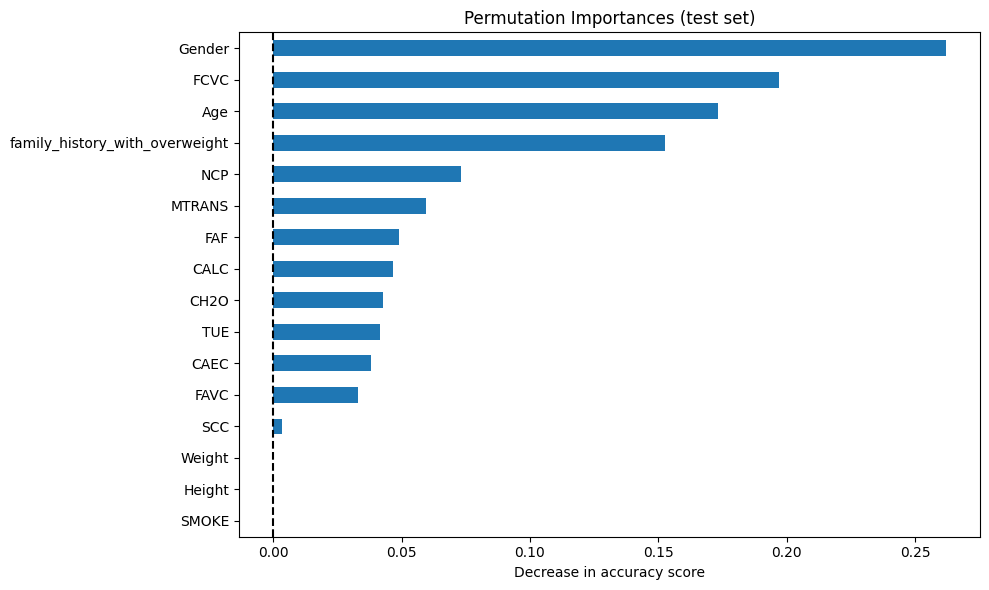

In [101]:
Results_RF = permutation_importance(
    Modelo_RF, X_test, Y_test, n_repeats=10, random_state=17, n_jobs=2
)
sorted_importances_idx = Results_RF.importances_mean.argsort()
importances = pd.DataFrame(
    Results_RF.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
fig, ax = plt.subplots(figsize=(10, 6))
importances.mean().plot.barh(ax=ax)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")

plt.tight_layout()
plt.show()

La gráfica de importancias nos dice que las variables de género, el consumo de vegetales (FCVC), la edad y los antecedentes de obesidad en la familia son los que tienen una mayor importancia en la predicción del modelo, lo cuál suena bastante lógico y razonable.

   Real  Predicción
0   0.0         0.0
1   6.0         6.0
2   5.0         5.0
3   3.0         3.0
4   5.0         5.0
              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92        64
         1.0       0.66      0.79      0.72        58
         2.0       0.90      0.79      0.84        48
         3.0       0.75      0.80      0.77        55
         4.0       0.92      0.86      0.89        71
         5.0       0.93      0.96      0.95        56
         6.0       1.00      0.99      0.99        71

    accuracy                           0.87       423
   macro avg       0.88      0.87      0.87       423
weighted avg       0.88      0.87      0.88       423



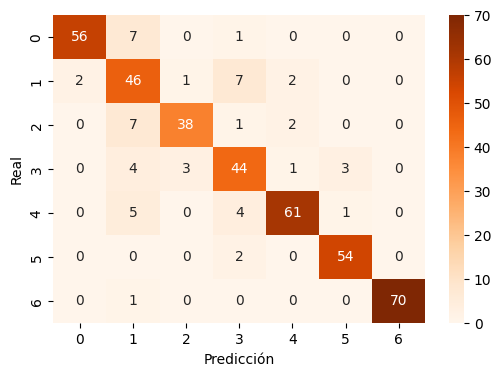

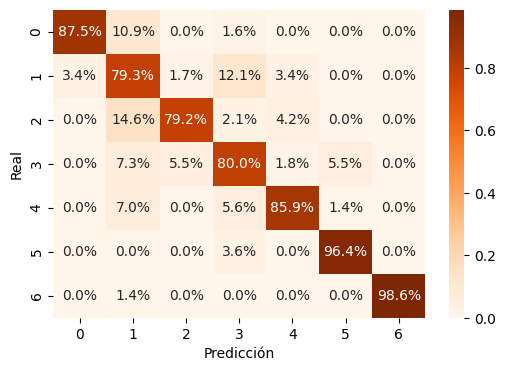

In [121]:
y_pred = Modelo_RF.predict(X_test)
Resultado = pd.DataFrame({'Real': Y_test.flatten(), 'Predicción': y_pred.flatten()})
print(Resultado.head())

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(Y_test.flatten(), y_pred.flatten()))

Matrix_Conf = confusion_matrix(Y_test.flatten(), y_pred.flatten())
plt.figure(figsize=(6, 4))
sns.heatmap(Matrix_Conf, annot=True, fmt="d", cmap='Oranges')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

etiquetas_unicas = np.unique(Y_test)
Total_Clase = Matrix_Conf.sum(axis=1)
Matrix_Cof_Porc = Matrix_Conf / Total_Clase[:, np.newaxis]
plt.figure(figsize=(6, 4))
sns.heatmap(Matrix_Cof_Porc, annot=True, fmt=".1%", cmap='Oranges')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

La matriz de correlación deja ver un altísimi nivel de correcta clasificación (del 80% o más) en todos los niveles de obesidad, confirmando que es un modelo que proporciona un buen nivel de ajuste y de calidad en la prediciión.